# Tập dữ liệu trên pytorch và tải dữ liêu với Dataloaders

### Thư viện tourch.utils.data.Datasets: chứa datasets
### Thư viện torch.utils.data.DataLoaders: gọi để tải dữ liệu từ Torch

## 1. Tải tập dữ liệu
Dataset Fashion-MNIST từ TorchVision gồm 60,000 dữ liệu huấn luyện và 10,000 dữ liêu kiểm tra
Mỗi phần tử là một ảnh xám kích thước 28x28 được chia làm 10

In [1]:
import torch
from IPython.extensions.storemagic import restore_data
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor())
restore_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor())

100.0%
100.0%
100.0%
100.0%


In [10]:
print(type(training_data))

<class 'torchvision.datasets.mnist.FashionMNIST'>


## 2. Trực quan hóa dữ liệu


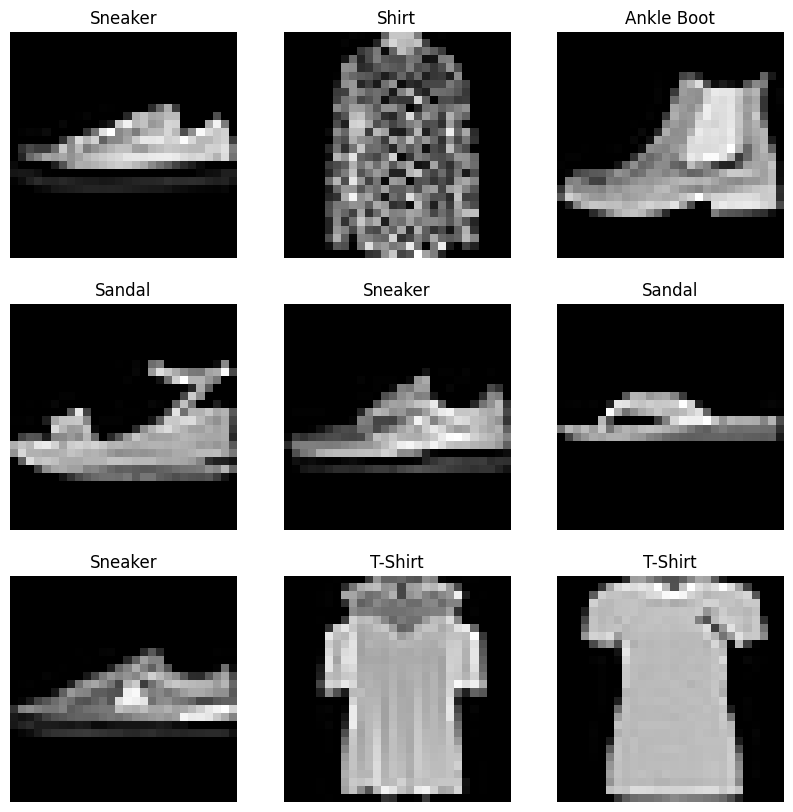

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
fig = plt.figure(figsize=(10, 10))
cols,rows = 3,3
for i in range(1, cols*rows+1):
    _sample = torch.randint(len(training_data), size=(1,)).item() # lấy ngẫu nhiên 1 phần từ trong tập training_data
    img,label = training_data[_sample] # trả về một tuple gồm image và label
    fig.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

## Có thể sử dụng transform để biến đổi data trong quá trình nạp bởi DataLoaders
> target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1)
<p>  Câu lệnh trên biến đổi về one-hot kích thước vector 10.